In [30]:
# Styling notebook
from IPython.core.display import display, HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

C:\Users\Renata\AppData\Local\Temp\ipykernel_17632\1617930524.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Inicio

## Importação de libs

In [4]:
# para ler arquivo excel (xls)
# conda install -c anaconda xlrd

import datetime
from datetime import datetime
import os

# Analise
import pandas as pd 
import numpy as np 

#Visualization
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import plotly
import plotly.express as px

## Configurações

In [5]:
# para habilitar rolagem horizontal do dataframe 
# caso não funcione no Firefox
from IPython.display import display, HTML
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>"))

In [6]:
# formatação de mensagens de print
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
#print(color.BOLD + 'Hello World !' + color.END)

## Parâmetros

In [7]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('max_colwidth', 1000) # tamanho das colunas para exibição do conteúdo de textos longos

np.set_printoptions(threshold=1000)

# Formatar numeros float (2 casas decimais)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# Formatações para gráficos
sns.set(style="darkgrid") #cor da area dos plots
figsize = (10,10)

## Links uteis

- Cores em graficos plotly: https://plotly.com/python/discrete-color/
- https://www.selecolor.com/en/recommended-color-palette/

# Definição de funções

## checar_df

Para um determinado dataframe, são verificados:

- total de registros;
- quantidade e tipos de colunas;
- quantidade de valores únicos;
- quantidade de valores nulos (para identificar a necessidade de pre processamento dos dados).

In [8]:
def checar_df(df):
    print(color.BOLD  + color.RED + 'Informações do dataframe: ' + color.END)
    df.info()
    
    print(color.BOLD + color.RED + "\nNúmero de observacoes na base de dados: " + color.END, df.shape[0])
    print('Total de ', df.shape[1], 'Colunas: ', df.columns.values.tolist())
    
    print(color.BOLD + color.RED + "\nNúmero de valores unicos (Não inclui NaN): " + color.END)
    display(df.nunique(dropna=True).to_frame(name='Contagem Unicos').sort_index())
    
    print(color.BOLD + color.RED + "Número de valores nulos:" + color.END)
    display(df.isnull().sum().sort_values(ascending=False).to_frame(name='Contagem Nulos').sort_index())

## Gerar Plot de Evolução por Ano

In [335]:
def gerar_plot_evol_ano(df, col_ano, col_grupo, col_soma, legenda_outside):

    # exibe primeiros registros do df
    print('Exibindo alguns registros do df consolidado...\n')
    df_plot = df.groupby([col_ano, col_grupo])[col_soma].sum().reset_index().rename(columns={col_soma:'Total'})
    display(df_plot.head(5))
    
    ano_min = df_plot[col_ano].min()
    ano_max = df_plot[col_ano].max()
    
    print(f'Soma da coluna {col_soma} nos anos de {ano_min} a {ano_max}: {df[col_soma].sum()}')

    f, axes = plt.subplots(1, 1,  figsize=(20,8))
    
    data = df_plot.copy()
    data['Total'] = data['Total']/1000
    
    sns.pointplot(x=col_ano, y='Total', hue=col_grupo, 
                data=data.sort_values(by=([col_ano,'Total']), ascending=[False,False]), ax=axes,
                 markers='o')
    
    axes.set_title(f'Evolução {col_soma} PRESENCIAL por Ano', fontsize=20)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha="right", fontsize=16)
    axes.set(xlabel=''); axes.set_ylabel('Total (x 1000)', fontsize=18)
    
    limite_sup = df_plot['Total'].max()/1000 * 1.10
    intervalo = round((limite_sup/10)/100)*100
    if intervalo ==0: intervalo=50
    major_yticks = np.arange(0, limite_sup, intervalo); 
    axes.set_yticks(major_yticks)
    axes.tick_params(axis='y', labelsize=14)
    axes.grid(color='gray', linestyle='--', linewidth=1.2, axis='both', alpha=.2)

    axes.legend(loc='best', fontsize=18)
    if legenda_outside == 'S':
        axes.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, 
                    ncol=2, fontsize='large')
    
    plt.close(2)
    plt.show()

# Carga dos Dados 

## Dados IBGE

In [9]:
# definir os tipos de algumas colunas
# para facilitar operações de merge
list_col_string = ['COD_IBGE', 'CAPITAL','Cod_Mesorregiao','Cod_Microrregiao'] 
dict_dtype = {column : 'str'  for column in list_col_string}

ibge = pd.read_csv('./dados/preparados/dados_ibge_consolidado.csv', sep='|', 
                   dtype = dict_dtype, 
                   low_memory=False)

# renomear colunas para nomes mais intuitivos
ibge = ibge.rename(columns={'POP_IBGE_2013':'POP_2013',
                            'POP_IBGE_2022':'POP_2022'})

ibge.info()
ibge.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REGIAO             5570 non-null   object 
 1   SIGLA_UF           5570 non-null   object 
 2   NOME_UF            5570 non-null   object 
 3   COD_IBGE           5570 non-null   object 
 4   NOME_MUNICIPIO     5570 non-null   object 
 5   LAT                5570 non-null   float64
 6   LNG                5570 non-null   float64
 7   POP_2013           5570 non-null   int64  
 8   CAPITAL            5570 non-null   object 
 9   POP_2022           5570 non-null   int64  
 10  Cod_Mesorregiao    5570 non-null   object 
 11  Nome_Mesorregiao   5570 non-null   object 
 12  Cod_Microrregiao   5570 non-null   object 
 13  Nome_Microrregiao  5570 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 609.3+ KB


,REGIAO,SIGLA_UF,NOME_UF,COD_IBGE,NOME_MUNICIPIO,LAT,LNG,POP_2013,CAPITAL,POP_2022,Cod_Mesorregiao,Nome_Mesorregiao,Cod_Microrregiao,Nome_Microrregiao
0,N,RO,Rondônia,1100015,Alta Floresta D'Oeste,-11.94,-62.00,25728,0,21558,02,Leste Rondoniense,006,Cacoal
1,N,RO,Rondônia,1100023,Ariquemes,-9.91,-63.03,101269,0,100896,02,Leste Rondoniense,003,Ariquemes
2,N,RO,Rondônia,1100031,Cabixi,-13.50,-60.54,6495,0,5107,02,Leste Rondoniense,008,Colorado do Oeste
3,N,RO,Rondônia,1100049,Cacoal,-11.43,-61.44,85863,0,92202,02,Leste Rondoniense,006,Cacoal
4,N,RO,Rondônia,1100056,Cerejeiras,-13.20,-60.82,18041,0,15237,02,Leste Rondoniense,008,Colorado do Oeste


## Dados Matriculas 2012 a 2022

In [15]:
# selecionar todas colunas que começam com CO_ e outras (transformar em string) 
#colunas_CO = [col for col in cursos if col.startswith('CO_')] + ['IN_CAPITAL', 'IN_GRATUITO']
colunas_CO = ['CO_REGIAO', 'CO_UF', 'CO_MUNICIPIO', 'CO_IES', 'CO_CURSO', 'CO_CINE_ROTULO', 'CO_CINE_AREA_GERAL',
 'CO_CINE_AREA_ESPECIFICA', 'CO_CINE_AREA_DETALHADA', 'IN_CAPITAL', 'IN_GRATUITO']

col_int = ['NU_ANO_CENSO', 'NO_CINE_AREA_GERAL','Tipo_Rede','QT_MAT',
          'QT_MAT_FEM', 'QT_MAT_MASC', 'QT_MAT_DIURNO', 'QT_MAT_NOTURNO',
       'QT_MAT_0_17', 'QT_MAT_18_24', 'QT_MAT_25_29', 'QT_MAT_30_34',
       'QT_MAT_35_39', 'QT_MAT_40_49', 'QT_MAT_50_59', 'QT_MAT_60_MAIS',
       'QT_MAT_BRANCA', 'QT_MAT_PRETA', 'QT_MAT_PARDA', 'QT_MAT_AMARELA',
       'QT_MAT_INDIGENA', 'QT_MAT_CORND']

In [41]:
# # %%time
# dict_dtype = {column : 'str'  for column in colunas_CO}
# cursos_2013 = pd.read_csv('./dados/preparados/dados_cursos_escopo_consolidado_2013.csv', sep='|', 
#                    dtype = dict_dtype, 
#                    low_memory=False)
# cursos_2013.shape

(25674, 208)

In [33]:
%%time

# prepara lista de csvs 2012 a 2022
lista_csvs = [ f'dados_cursos_escopo_consolidado_{i}.csv' for i in range(2012,2023,1)]

dict_dtype = {column : 'str'  for column in colunas_CO}
df_all = pd.concat((
    pd.read_csv(f'./dados/preparados/{file}', sep='|', 
                          dtype = dict_dtype, 
                          low_memory=False
                          #usecols=col_int
               )
    for file in lista_csvs))

CPU times: total: 10.9 s
Wall time: 11.2 s


In [141]:
# Verifica contagem de registros de cursos em cada ano
df_all['NU_ANO_CENSO'].value_counts().sort_index()

NU_ANO_CENSO
2012    25682
2013    25674
2014    26251
2015    27344
2016    28208
2017    29034
2018    30620
2019    31544
2020    31382
2021    31203
2022    31309
Name: count, dtype: int64

In [35]:
# salvar em arquivo
#df_all.to_csv('./dados/preparados/dados_cursos_2012_2022.csv', sep='|', index=False)

# Tratamentos

## Correção de dados do ano de 2013

Todos os registros com o campo TP_REDE = nan
Desta forma, será feita atualização deste campo em função do campo TP_CATEGORIA_ADMINISTRATIVA (Tipo_Cat_Admn)

In [47]:
display(df_all[df_all['NU_ANO_CENSO']==2013]['TP_REDE'].value_counts())
df_all[df_all['NU_ANO_CENSO']==2013]['Tipo_Cat_Admn'].value_counts()

Series([], Name: count, dtype: int64)

Tipo_Cat_Admn
Privada sem fins lucrativos    11130
Privada com fins lucrativos     9049
Pública Federal                 5495
Name: count, dtype: int64

In [48]:
cursos_2013[cursos_2013['NU_ANO_CENSO']==2013]['Tipo_Cat_Admn'].value_counts()

Tipo_Cat_Admn
Privada sem fins lucrativos    11130
Privada com fins lucrativos     9049
Pública Federal                 5495
Name: count, dtype: int64

In [49]:
df_all['TIPO_INST'] = np.where(df_all['Tipo_Cat_Admn'].str.contains('Pública'),'Pública','Privada')

In [51]:
df_all['Tipo_Cat_Admn'].value_counts()

Tipo_Cat_Admn
Privada com fins lucrativos    133550
Privada sem fins lucrativos    118184
Pública Federal                 66517
Name: count, dtype: int64

In [50]:
df_all['TIPO_INST'].value_counts()

TIPO_INST
Privada    251734
Pública     66517
Name: count, dtype: int64

# Graficos Matrículas

## Evolução Total Matriculas por Ano/ Tipo Rede

In [337]:
#df_all.groupby(['NU_ANO_CENSO', 'Tipo_Rede'])['QT_MAT'].sum() # problema com 2013
serie_matr = df_all.groupby(['NU_ANO_CENSO', 'TIPO_INST'])['QT_MAT'].sum().reset_index().rename(columns={'QT_MAT':'Total_matriculas'})
serie_matr.head()

,NU_ANO_CENSO,TIPO_INST,Total_matriculas
0,2012,Privada,4207735.00
1,2012,Pública,976471.00
2,2013,Privada,4373835.00
3,2013,Pública,1033732.00
4,2014,Privada,4664239.00


Total de matriculas nos anos de 2012 a 2022:  59098306.0


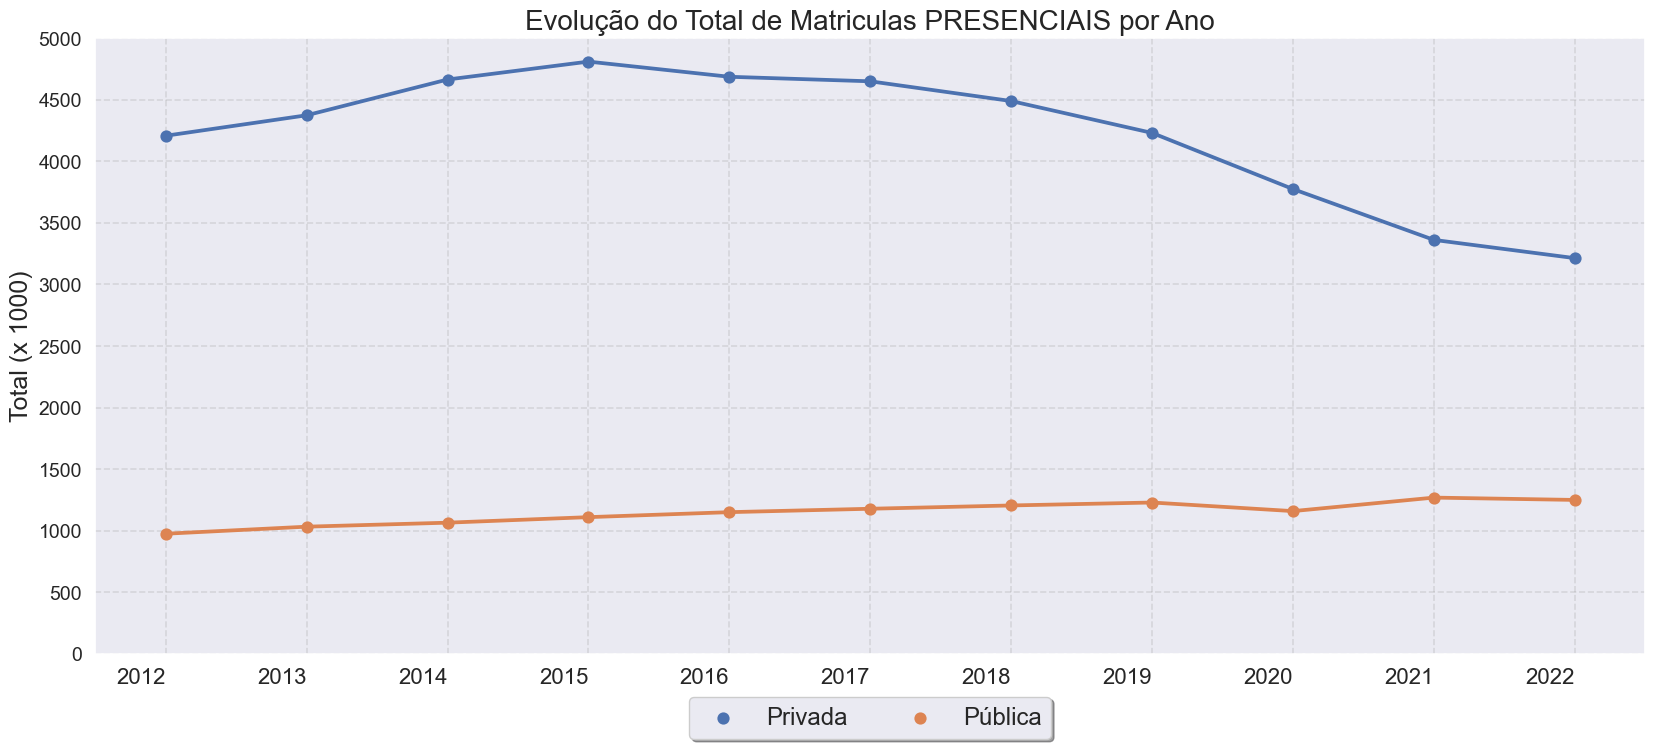

In [338]:
ano_min = serie_matr['NU_ANO_CENSO'].min()
ano_max = serie_matr['NU_ANO_CENSO'].max()
print('Total de matriculas nos anos de %s a %s: ' % (ano_min, ano_max ), serie_matr['Total_matriculas'].sum())

f, axes = plt.subplots(1, 1,  figsize=(20,8))

data = serie_matr.copy()
data['Total_matriculas'] = data['Total_matriculas']/1000

axes = sns.pointplot(x='NU_ANO_CENSO', y='Total_matriculas', hue='TIPO_INST', 
            data=data.sort_values(by=(['NU_ANO_CENSO','Total_matriculas']), ascending=[False,False]), 
             markers='o')

axes.set_title("Evolução do Total de Matriculas PRESENCIAIS por Ano", fontsize=20)
axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha="right", fontsize=16)
axes.set(xlabel=''); axes.set_ylabel('Total (x 1000)', fontsize=18)

limite_sup = serie_matr['Total_matriculas'].max()/1000 * 1.10
intervalo = round((limite_sup/10)/100)*100
major_yticks = np.arange(0, limite_sup, intervalo); 
axes.set_yticks(major_yticks)
axes.tick_params(axis='y', labelsize=14)

axes.grid(color='gray', linestyle='--', linewidth=1.2, axis='both', alpha=.2)

#axes.legend(loc='best', fontsize=18)
axes.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3,
           fontsize='x-large')


plt.close(2)
plt.show()

## Evolução Total Matriculas por Ano / Grau Academico

Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,Tipo_Grau_Acad,Total
0,2012,Bacharelado,3940215.00
1,2012,Licenciatura,671569.00
2,2012,Tecnológico,572422.00
3,2013,Bacharelado,4142248.00
4,2013,Licenciatura,683852.00


Soma da coluna QT_MAT nos anos de 2012 a 2022: 59098306.0


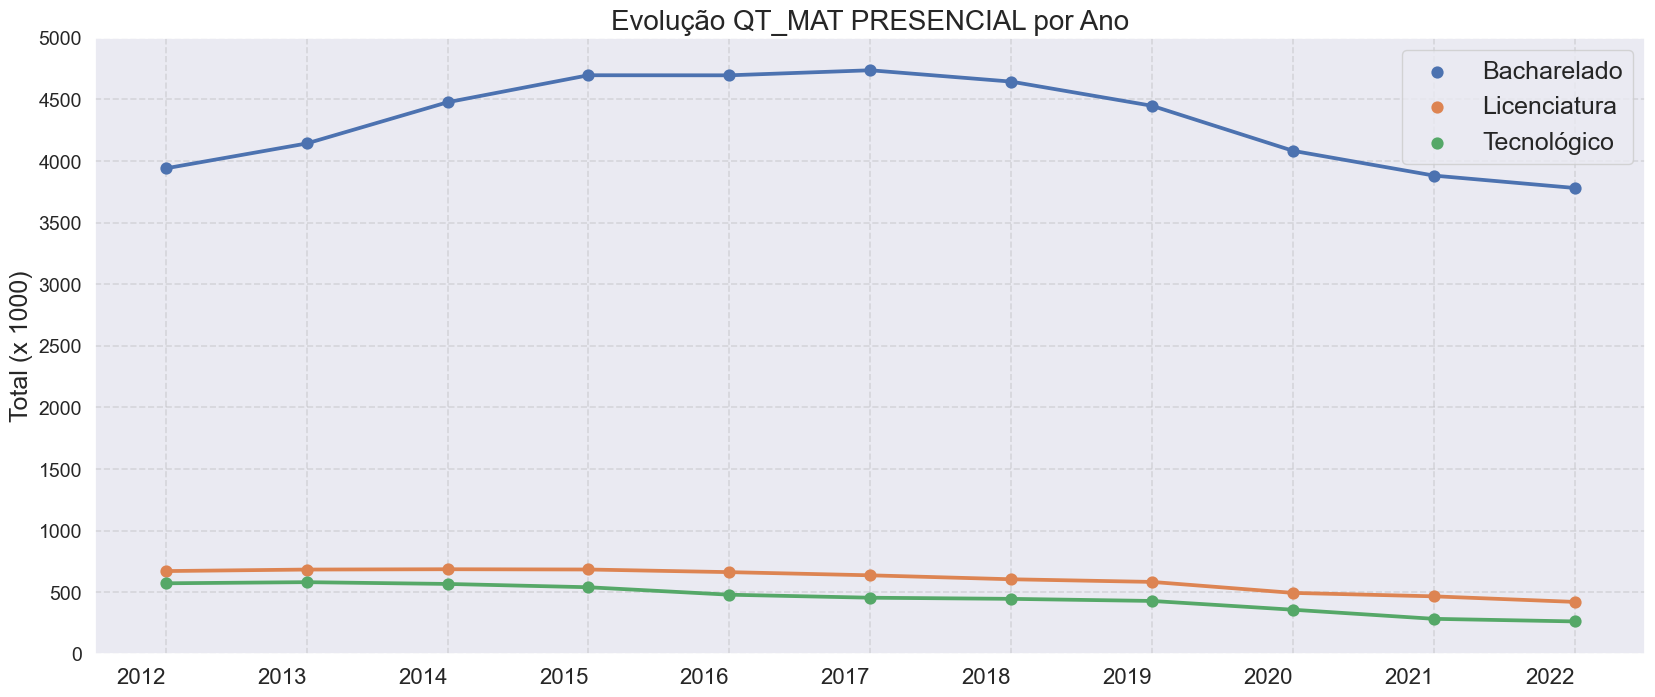

In [339]:
col_ano = 'NU_ANO_CENSO'
col_grupo = 'Tipo_Grau_Acad'
col_soma = 'QT_MAT'
legenda_outside = 'N'

gerar_plot_evol_ano(df_all, col_ano, col_grupo, col_soma, legenda_outside)

## Evolução Total Matriculas por Ano / Area Curso

Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,NO_CINE_AREA_GERAL,Total
0,2012,"Agricultura, silvicultura, pesca e veterinária",130065.00
1,2012,Artes e humanidades,134190.00
2,2012,"Ciências naturais, matemática e estatística",92645.00
3,2012,"Ciências sociais, comunicação e informação",300425.00
4,2012,Computação e Tecnologias da Informação e Comunicação (TIC),238926.00


Soma da coluna QT_MAT nos anos de 2012 a 2022: 59097487.0


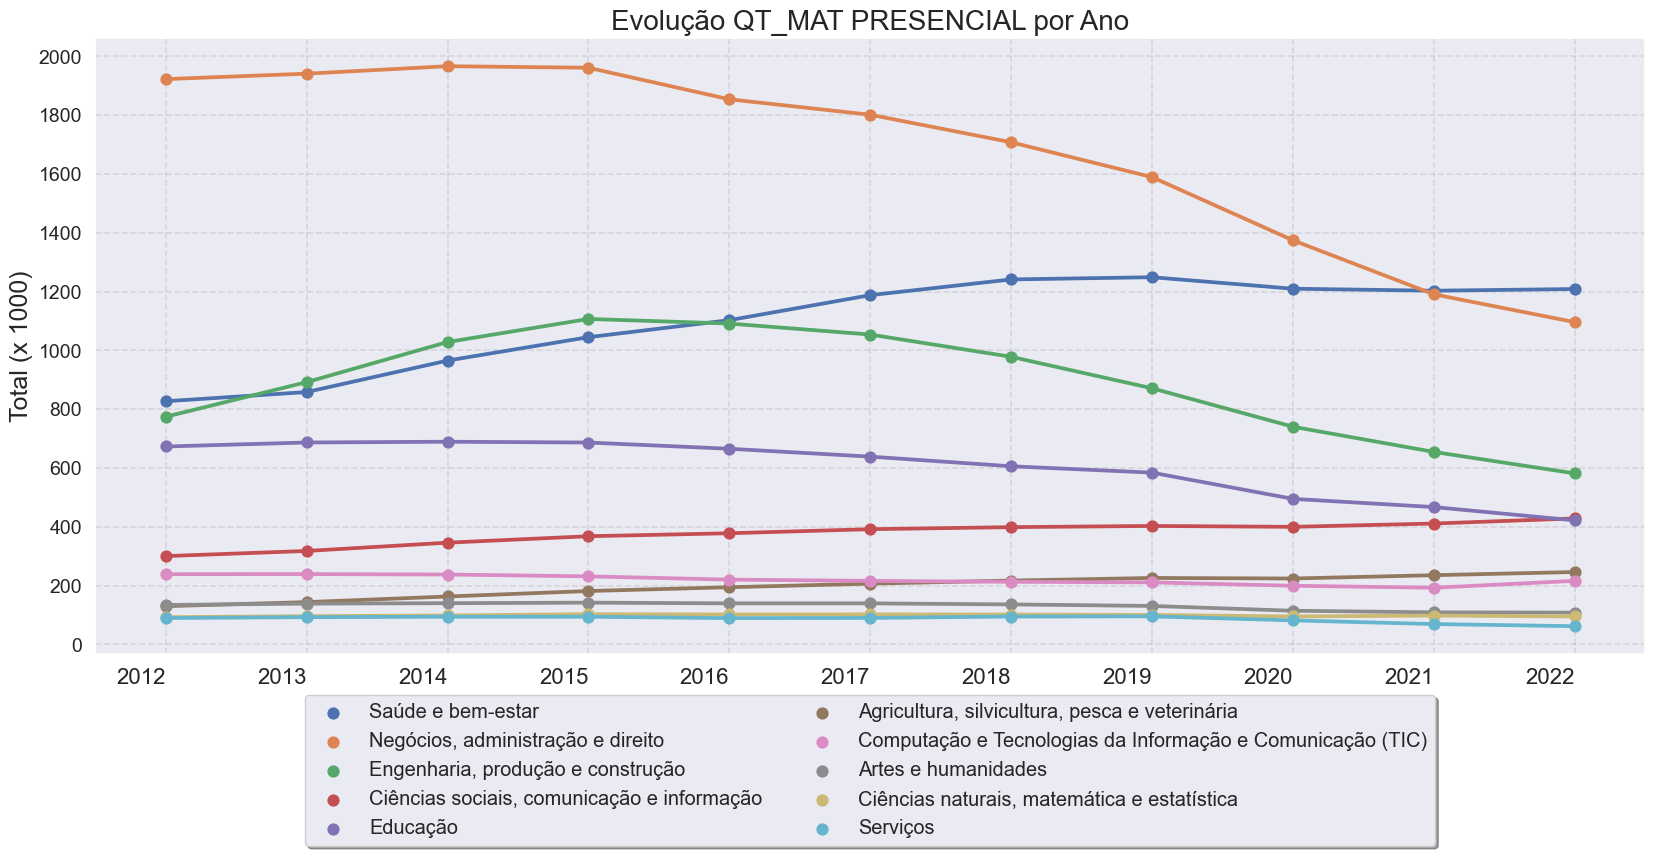

In [340]:
col_ano = 'NU_ANO_CENSO'
col_grupo = 'NO_CINE_AREA_GERAL'
col_soma = 'QT_MAT'
legenda_outside = 'S'

# retirar area especifica: Programas básicos
#df_all['NO_CINE_AREA_GERAL'].value_counts()
df_areas = df_all[~df_all['NO_CINE_AREA_GERAL'].isin(['Programas básicos'])]

gerar_plot_evol_ano(df_areas, col_ano, col_grupo, col_soma, legenda_outside)

# Graficos Ingressantes

## Evolução Total Ingressantes por Ano/ Tipo de Rede

Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,TIPO_INST,Total
0,2012,Privada,1704682.00
1,2012,Pública,293936.00
2,2013,Privada,1732254.00
3,2013,Pública,289980.00
4,2014,Privada,1877880.00


Soma da coluna QT_ING nos anos de 2012 a 2022: 20241266.0


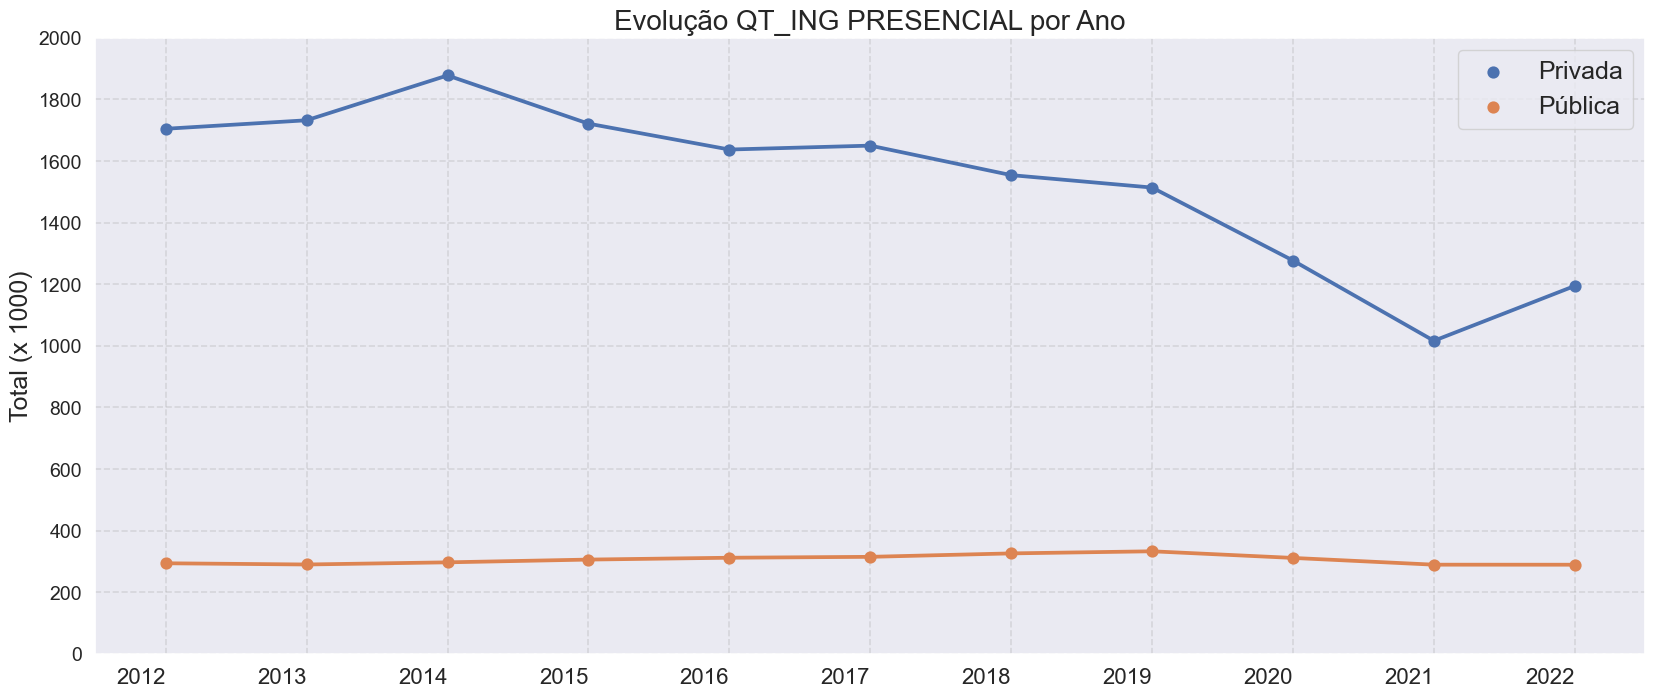

In [341]:
col_ano = 'NU_ANO_CENSO'
col_grupo = 'TIPO_INST'
col_soma = 'QT_ING'
legenda_outside = 'N'

gerar_plot_evol_ano(df_all, col_ano, col_grupo, col_soma, legenda_outside)

## Evolução Total Ingressantes por Ano/ Grau Academico

Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,Tipo_Grau_Acad,Total
0,2012,Bacharelado,1435112.00
1,2012,Licenciatura,243072.00
2,2012,Tecnológico,320434.00
3,2013,Bacharelado,1479142.00
4,2013,Licenciatura,243244.00


Soma da coluna QT_ING nos anos de 2012 a 2022: 20241266.0


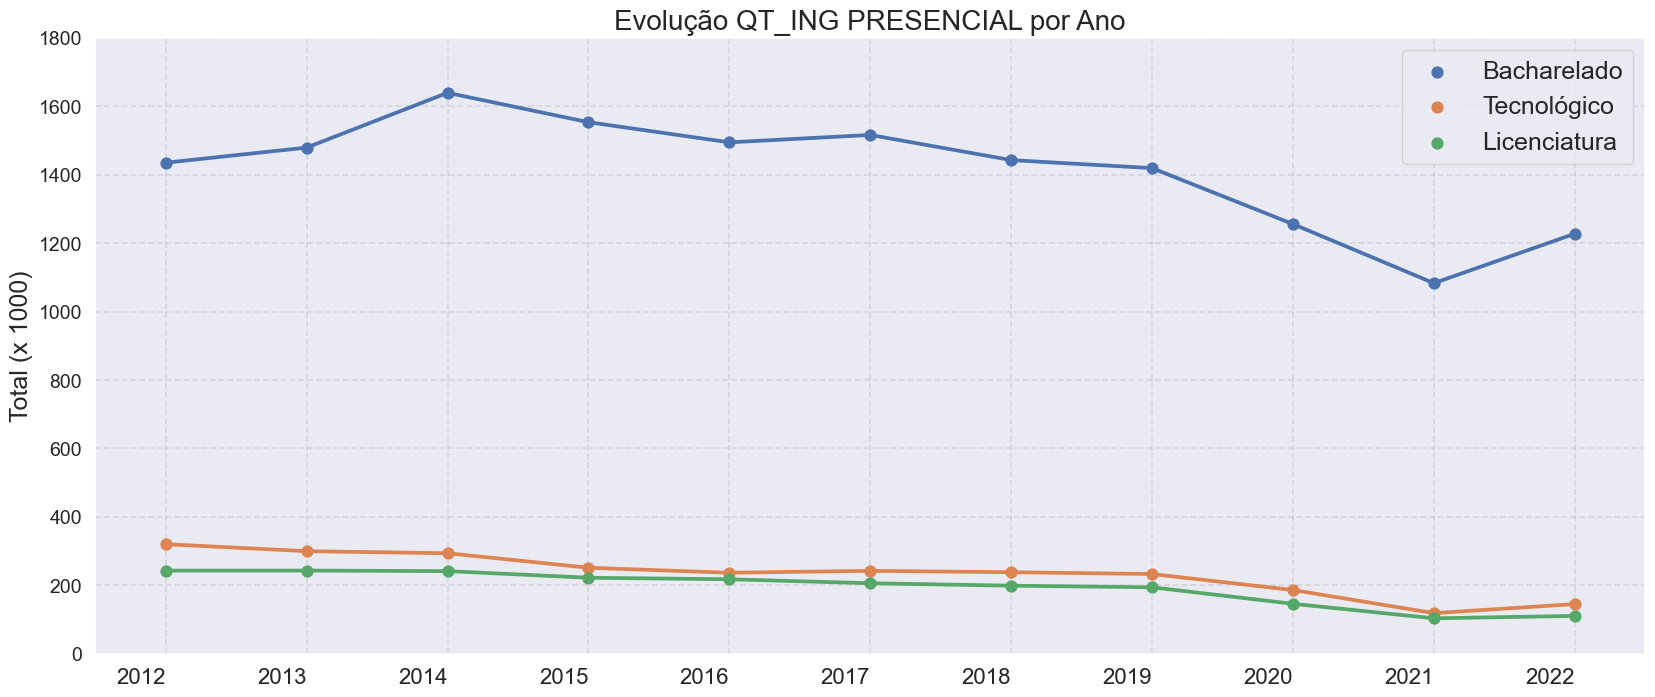

In [342]:
col_ano = 'NU_ANO_CENSO'
col_grupo = 'Tipo_Grau_Acad' 
col_soma = 'QT_ING'
legenda_outside='N'

gerar_plot_evol_ano(df_all, col_ano, col_grupo, col_soma, legenda_outside)

## Evolução Total Ingressantes por Ano / Area Curso

Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,NO_CINE_AREA_GERAL,Total
0,2012,"Agricultura, silvicultura, pesca e veterinária",43625.00
1,2012,Artes e humanidades,59913.00
2,2012,"Ciências naturais, matemática e estatística",34455.00
3,2012,"Ciências sociais, comunicação e informação",108320.00
4,2012,Computação e Tecnologias da Informação e Comunicação (TIC),104270.00


Soma da coluna QT_ING nos anos de 2012 a 2022: 20240792.0


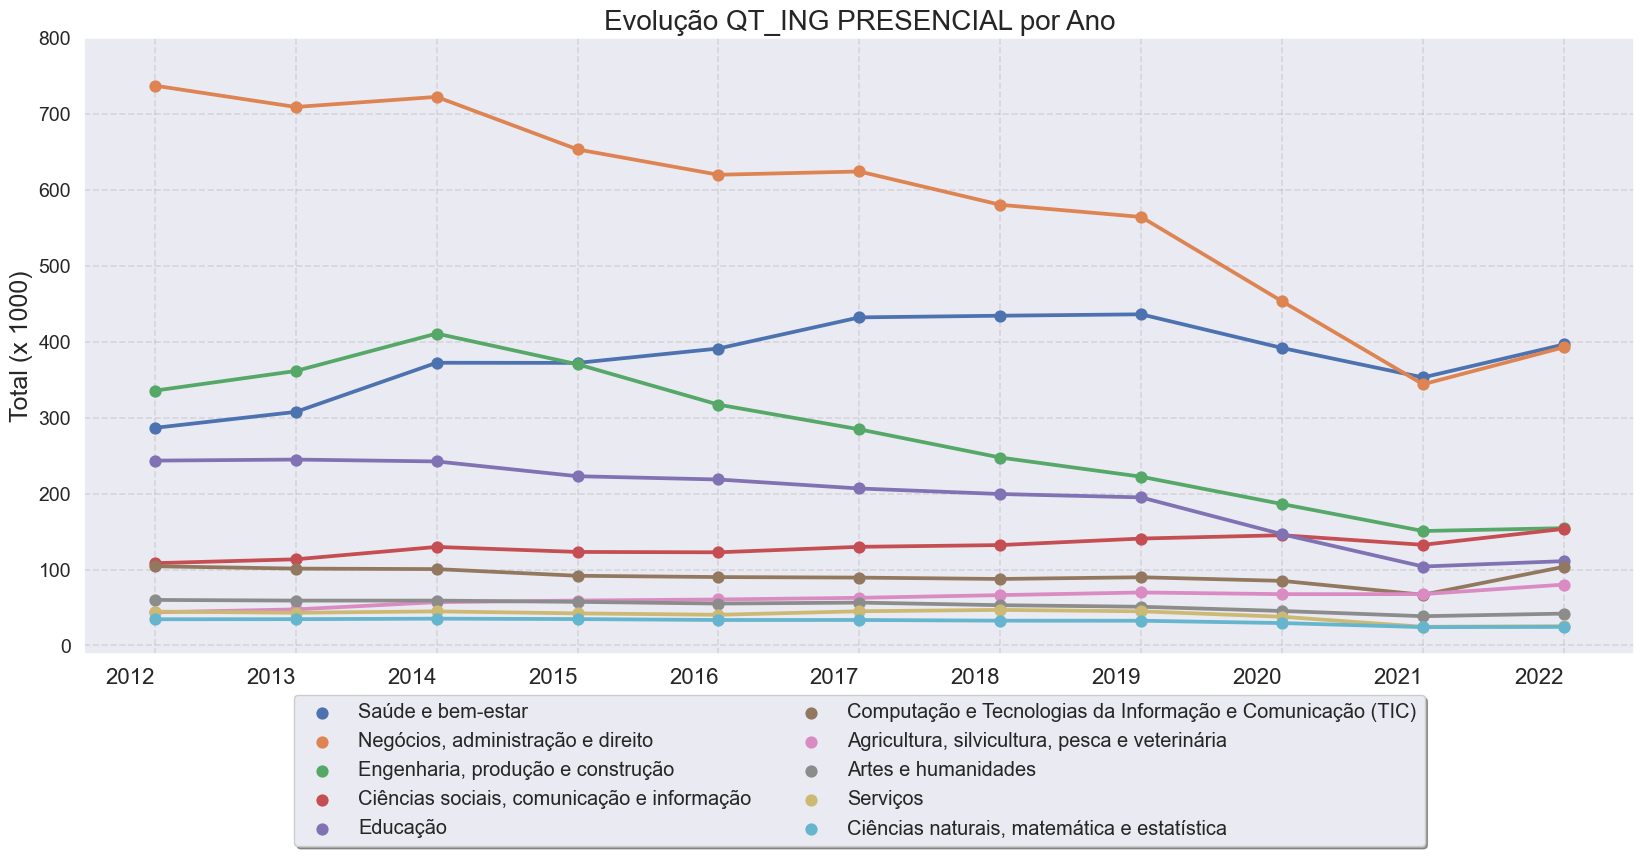

In [343]:
col_ano = 'NU_ANO_CENSO'
col_grupo = 'NO_CINE_AREA_GERAL'
col_soma = 'QT_ING'
legenda_outside = 'S'

# retirar area especifica: Programas básicos
#df_all['NO_CINE_AREA_GERAL'].value_counts()
df_areas = df_all[~df_all['NO_CINE_AREA_GERAL'].isin(['Programas básicos'])]

gerar_plot_evol_ano(df_areas, col_ano, col_grupo, col_soma, legenda_outside)

# Graficos Concluintes

## Evolução Total Concluintes por Ano/ Tipo de Rede

Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,TIPO_INST,Total
0,2012,Privada,673697.00
1,2012,Pública,96270.00
2,2013,Privada,623677.00
3,2013,Pública,107792.00
4,2014,Privada,611590.00


Soma da coluna QT_CONC nos anos de 2012 a 2022: 8757516.0


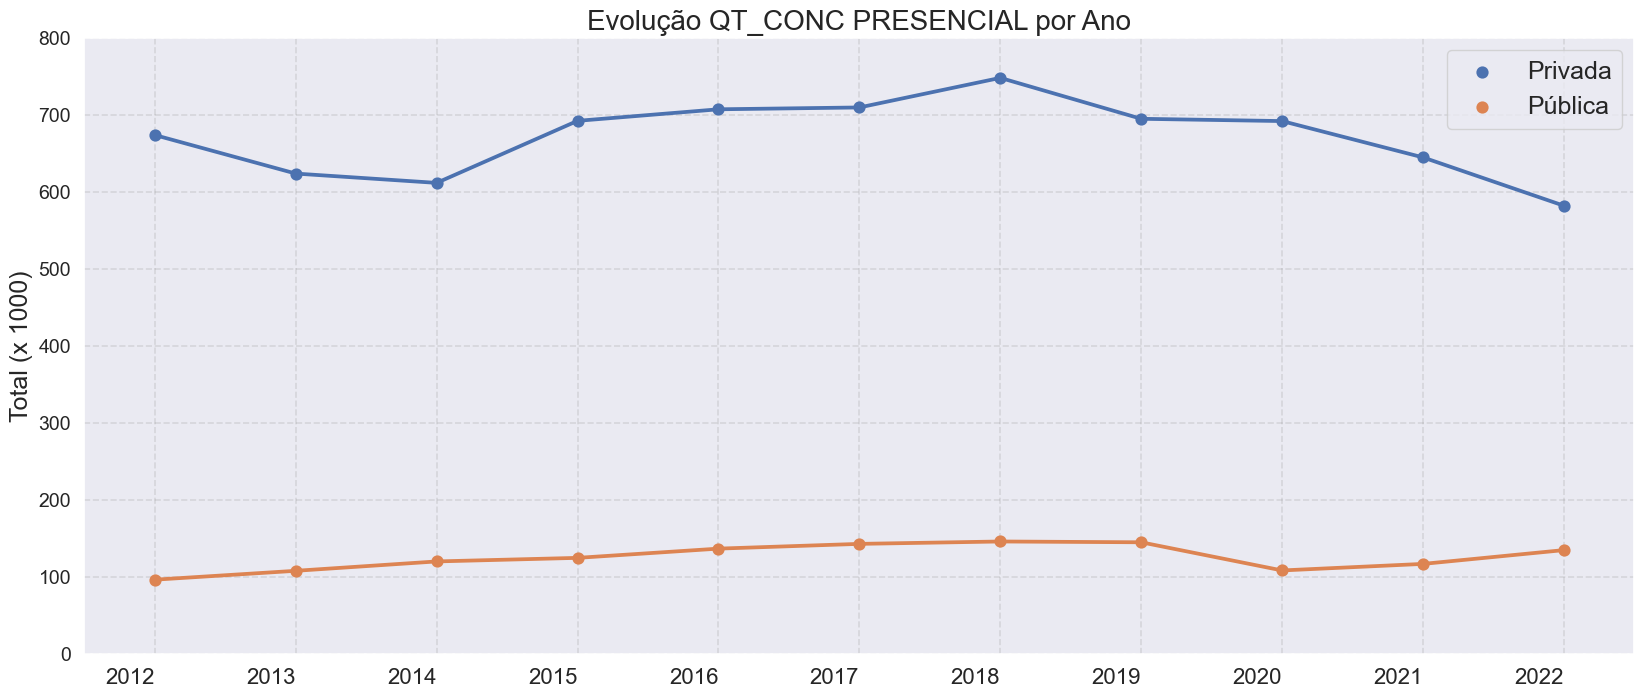

In [344]:
col_ano = 'NU_ANO_CENSO'
col_grupo = 'TIPO_INST' 
col_soma = 'QT_CONC'
legenda_outside = 'N'

gerar_plot_evol_ano(df_all, col_ano, col_grupo, col_soma, legenda_outside)

## Evolução Total Concluintes por Ano/ Grau Academico

Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,Tipo_Grau_Acad,Total
0,2012,Bacharelado,531898.00
1,2012,Licenciatura,111756.00
2,2012,Tecnológico,126313.00
3,2013,Bacharelado,495448.00
4,2013,Licenciatura,107994.00


Soma da coluna QT_CONC nos anos de 2012 a 2022: 8757516.0


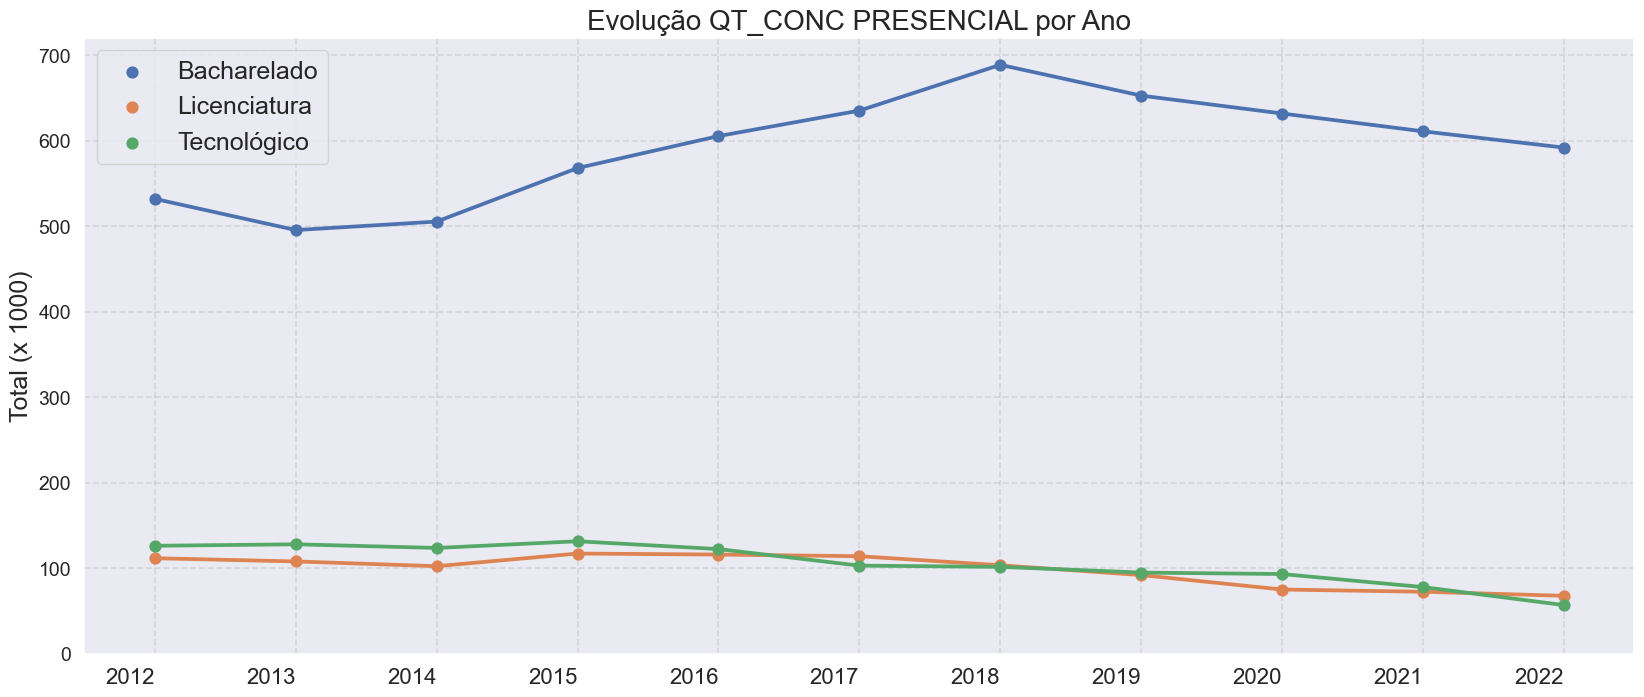

In [345]:
col_ano = 'NU_ANO_CENSO'
col_grupo = 'Tipo_Grau_Acad' 
col_soma = 'QT_CONC'
legenda_outside='N'

gerar_plot_evol_ano(df_all, col_ano, col_grupo, col_soma, legenda_outside)

## Evolução Total Concluintes por Ano / Area Curso

Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,NO_CINE_AREA_GERAL,Total
0,2012,"Agricultura, silvicultura, pesca e veterinária",13774.00
1,2012,Artes e humanidades,22723.00
2,2012,"Ciências naturais, matemática e estatística",11682.00
3,2012,"Ciências sociais, comunicação e informação",39620.00
4,2012,Computação e Tecnologias da Informação e Comunicação (TIC),34258.00


Soma da coluna QT_CONC nos anos de 2012 a 2022: 8757515.0


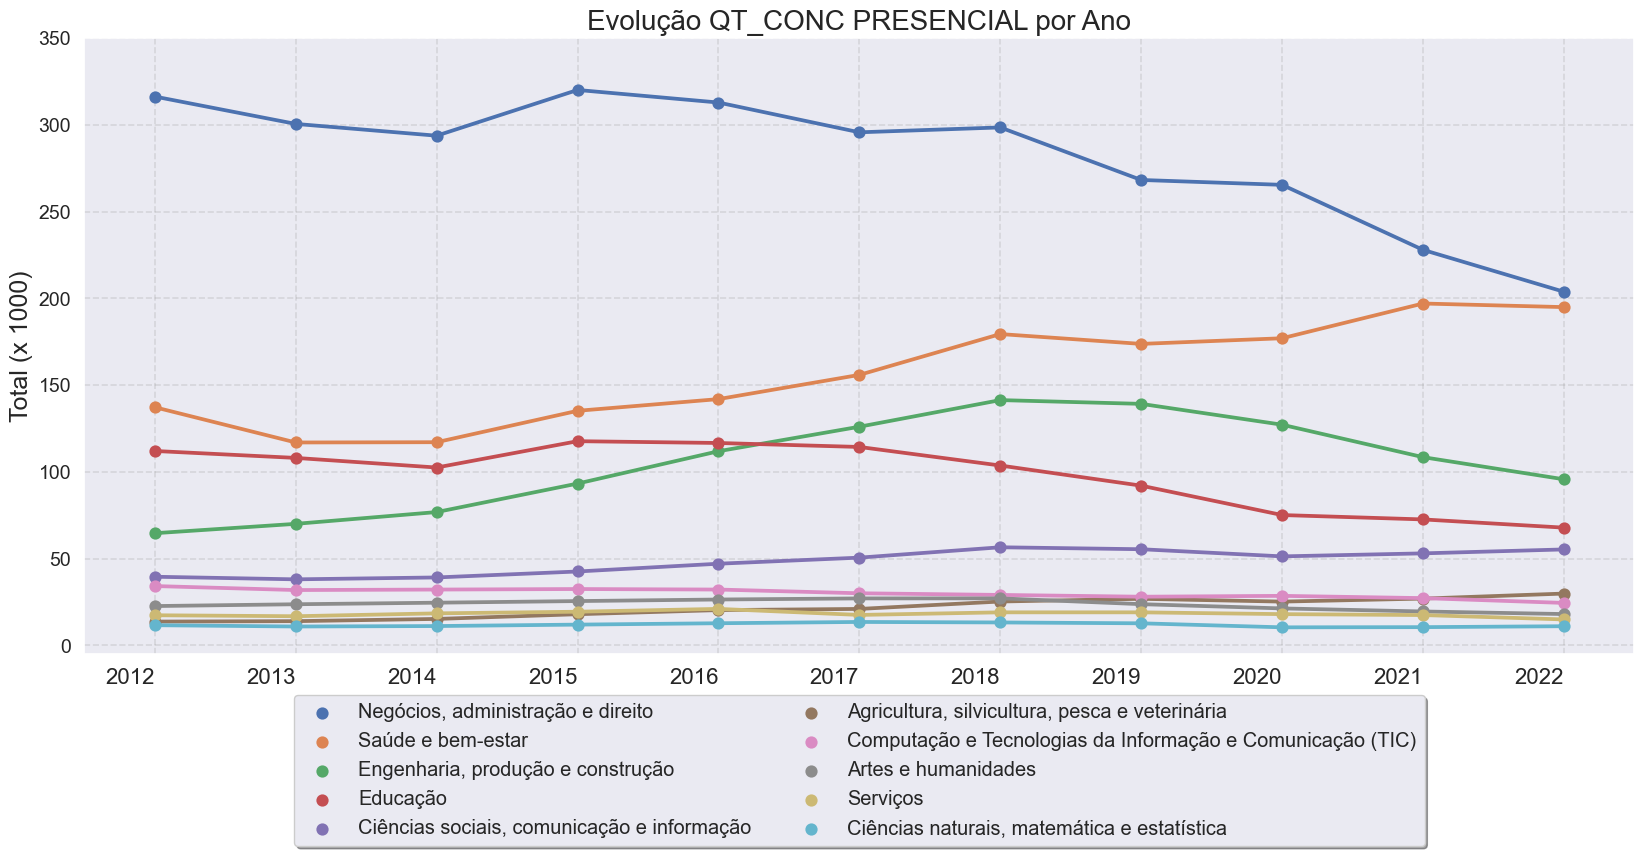

In [346]:
col_ano = 'NU_ANO_CENSO'
col_grupo = 'NO_CINE_AREA_GERAL'
col_soma = 'QT_CONC'
legenda_outside = 'S'

# retirar area especifica: Programas básicos
#df_all['NO_CINE_AREA_GERAL'].value_counts()
df_areas = df_all[~df_all['NO_CINE_AREA_GERAL'].isin(['Programas básicos'])]

gerar_plot_evol_ano(df_areas, col_ano, col_grupo, col_soma, legenda_outside)

# Graficos Consolidados

## TreeMap - Total Cursos x Total Matrículas

In [347]:
#para checar
#df_all[df_all['NU_ANO_CENSO']==ano].groupby('NO_CINE_AREA_GERAL')['QT_MAT'].sum()
#df_all[df_all['NU_ANO_CENSO']==ano].groupby('NO_CINE_AREA_GERAL')['QT_CURSO'].sum()
#df_all[df_all['NU_ANO_CENSO']==ano].groupby('NO_CINE_AREA_GERAL')['QT_ING'].sum()

#para um ano específico
# ano = 2022
# distr_cursos = df_all[df_all['NU_ANO_CENSO']==ano].groupby('NO_CINE_AREA_GERAL').\
#                                         agg({'QT_CURSO':'sum',
#                                              'QT_MAT':'sum',                                             
#                                              'QT_ING':'sum',
#                                              'QT_CONC':'sum'
#                                              }).reset_index()

Treemap de Cursos e Matriculas para o ano de 2012:


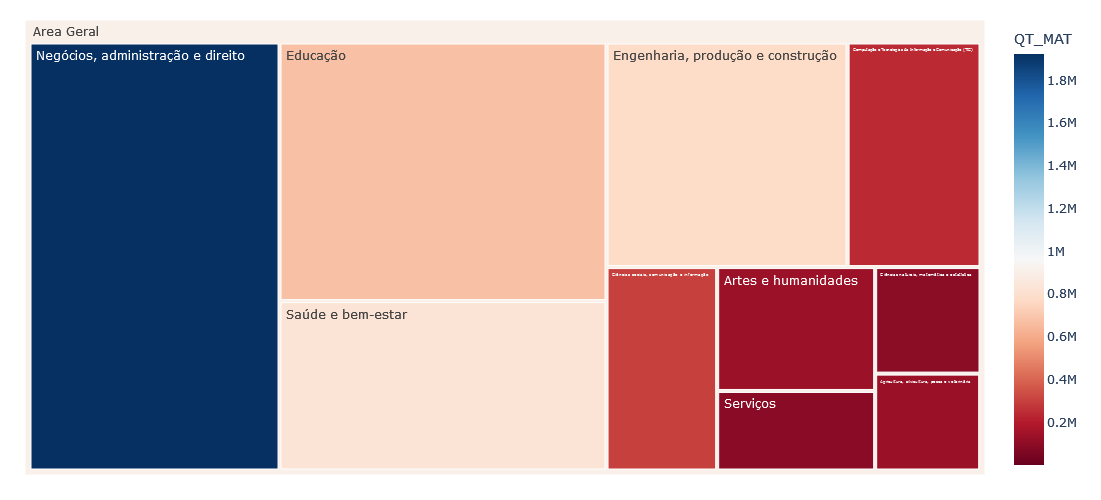

Treemap de Cursos e Matriculas para o ano de 2013:


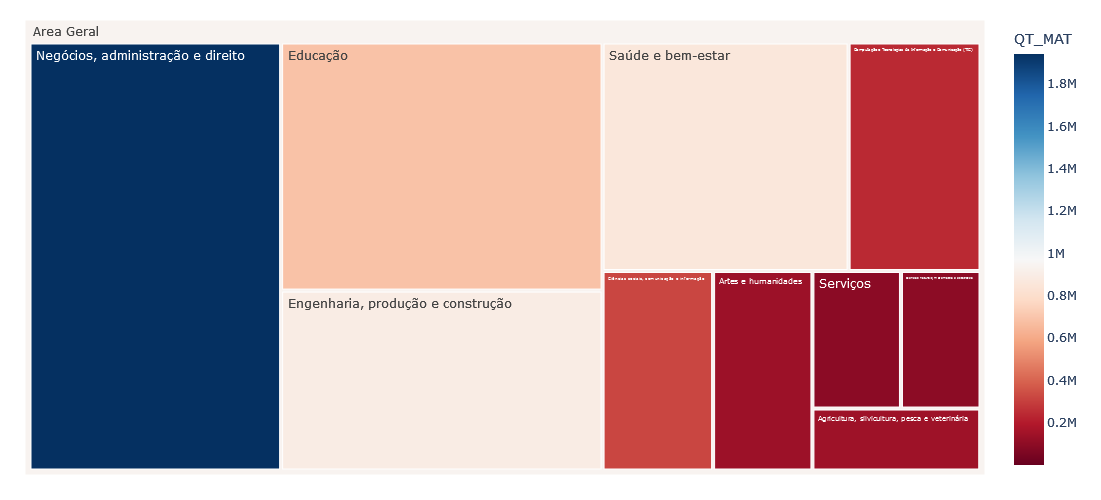

Treemap de Cursos e Matriculas para o ano de 2014:


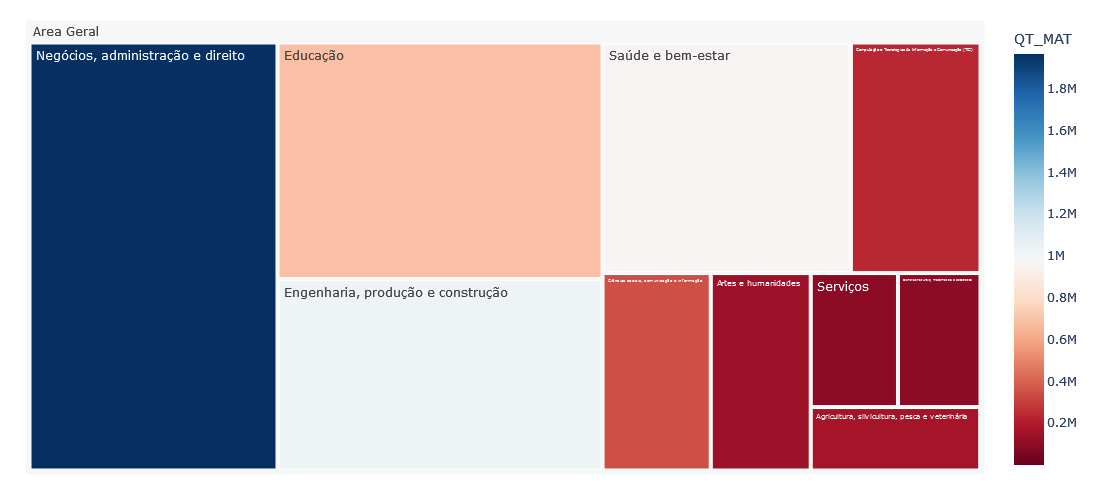

Treemap de Cursos e Matriculas para o ano de 2015:


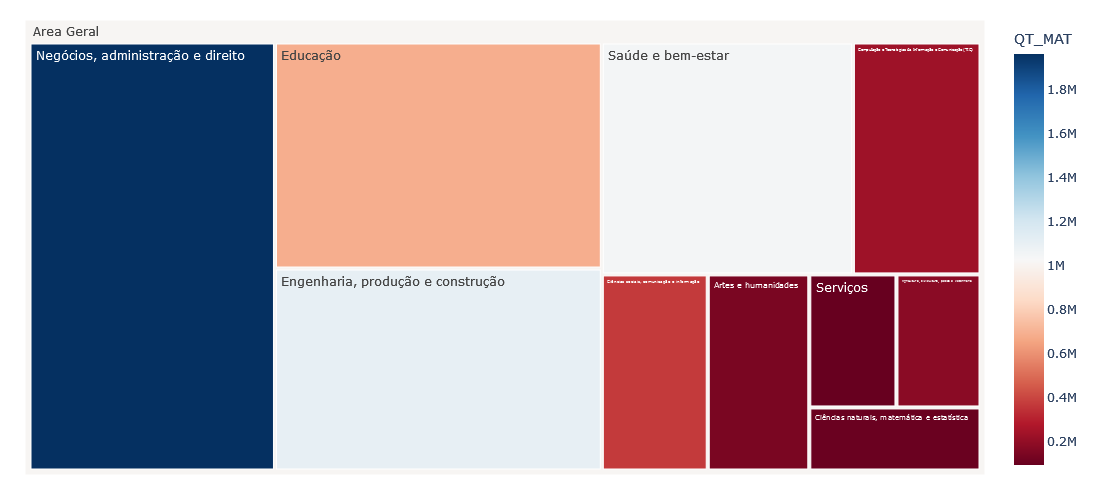

Treemap de Cursos e Matriculas para o ano de 2016:


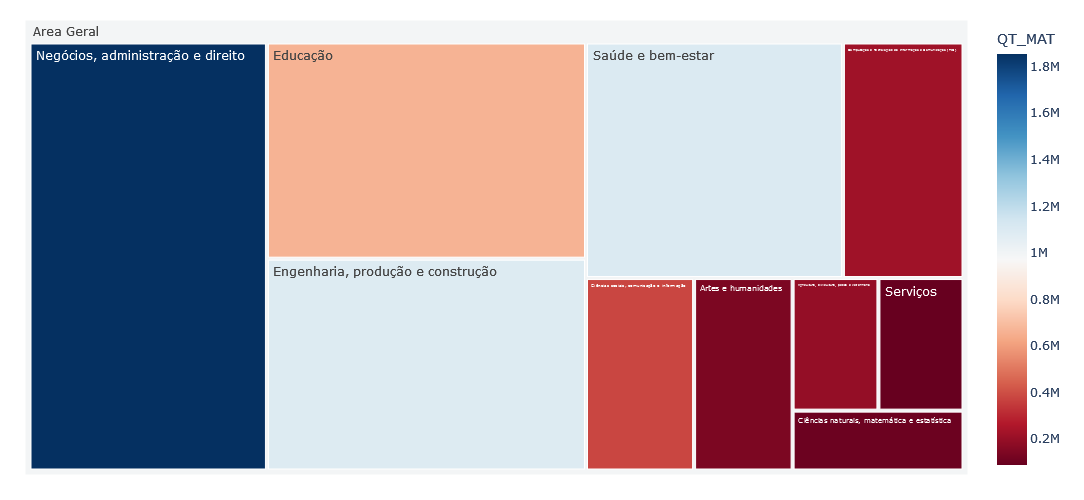

Treemap de Cursos e Matriculas para o ano de 2017:


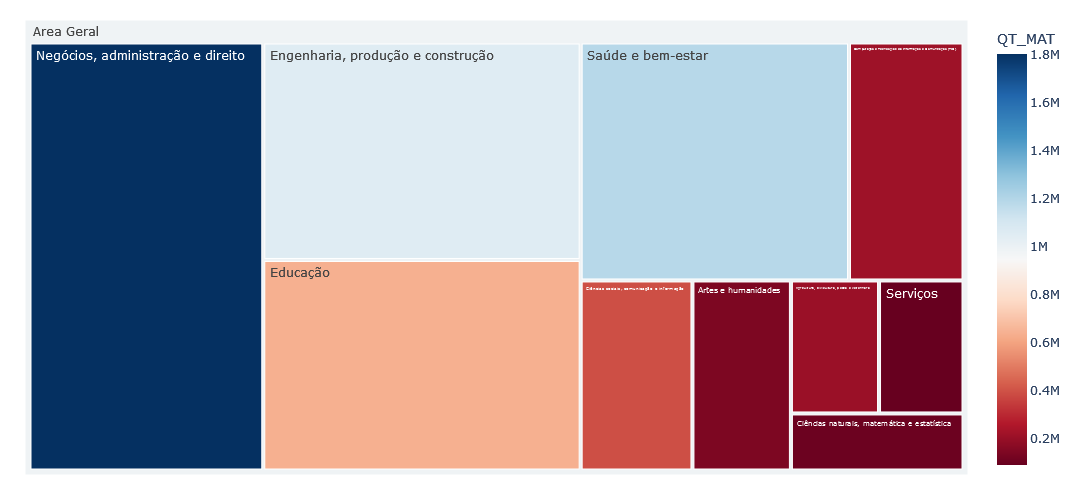

Treemap de Cursos e Matriculas para o ano de 2018:


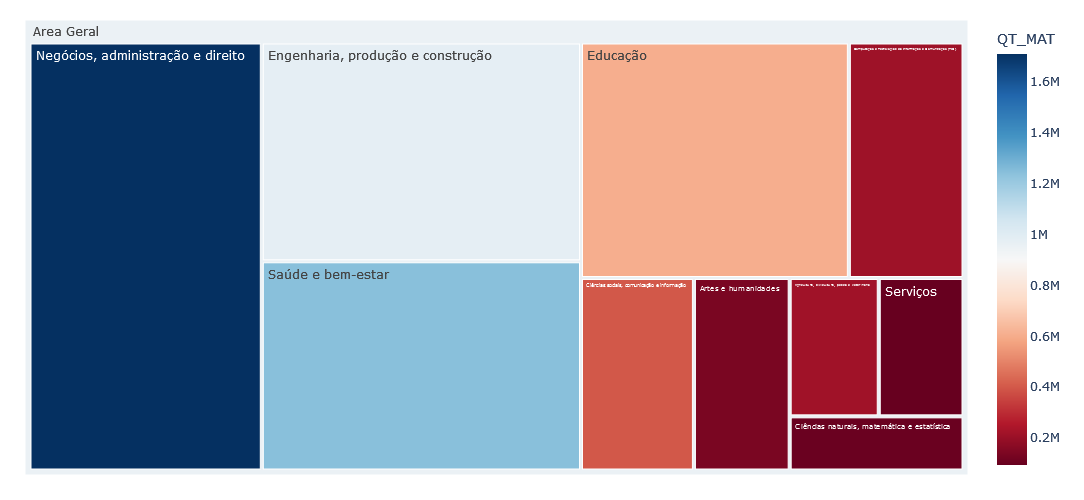

Treemap de Cursos e Matriculas para o ano de 2019:


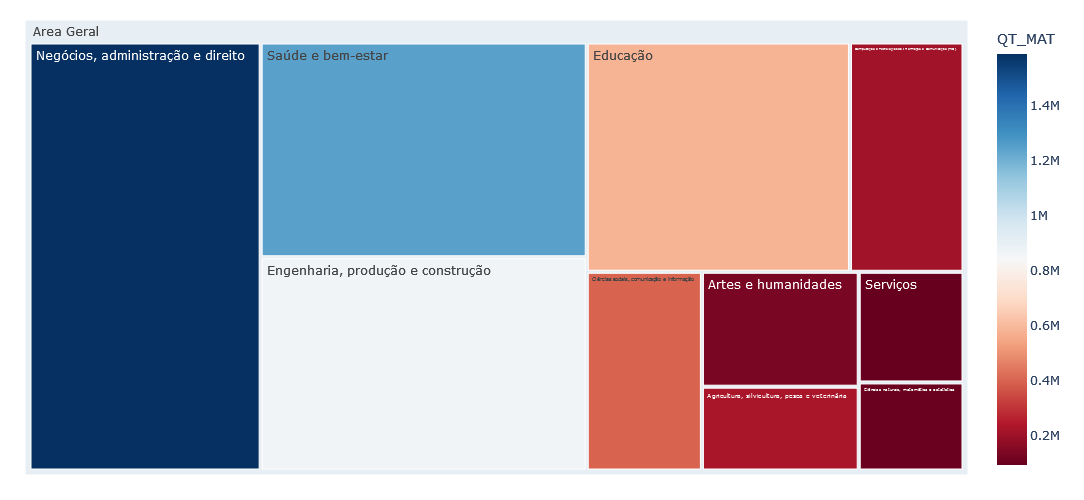

Treemap de Cursos e Matriculas para o ano de 2020:


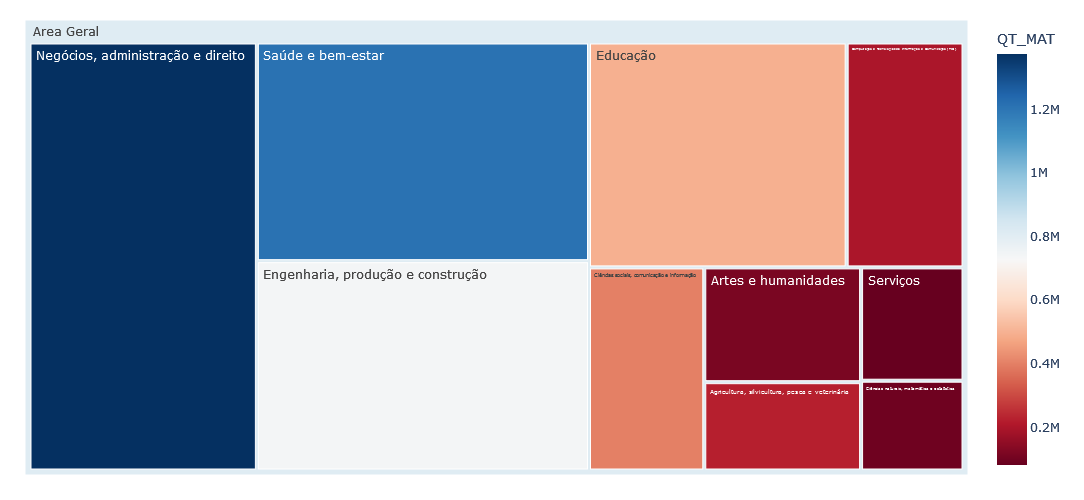

Treemap de Cursos e Matriculas para o ano de 2021:


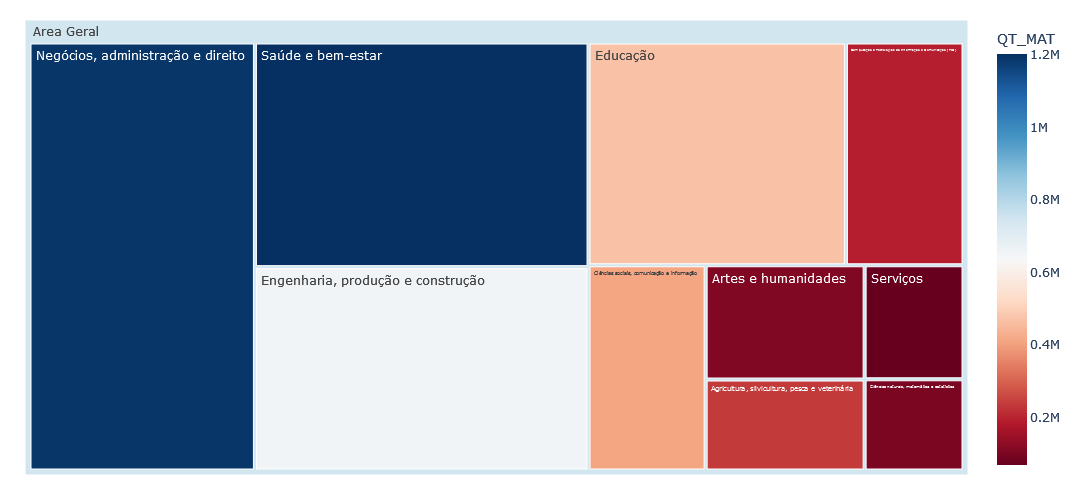

Treemap de Cursos e Matriculas para o ano de 2022:


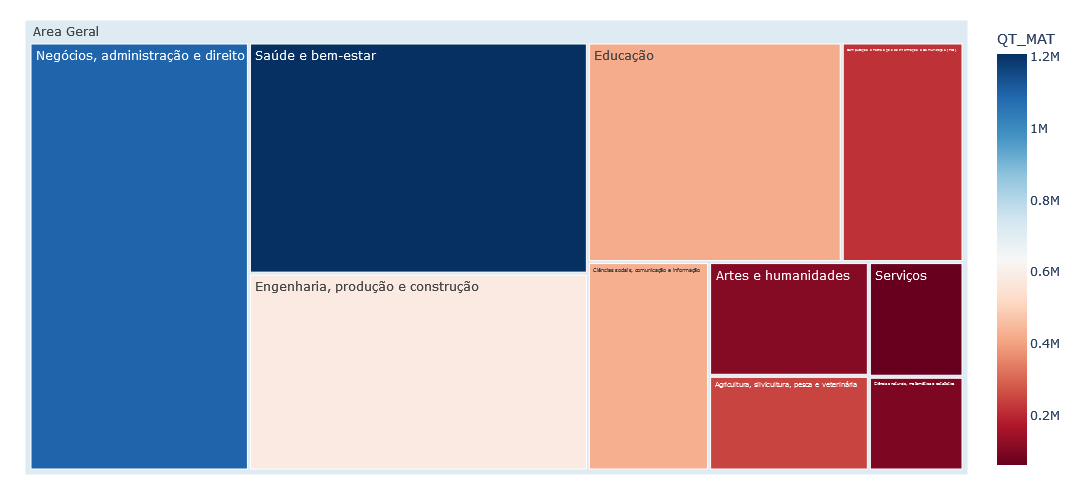

In [348]:
# para todos os anos
distr_cursos = df_all.groupby(['NU_ANO_CENSO','NO_CINE_AREA_GERAL']).\
                                        agg({'QT_CURSO':'sum',
                                             'QT_MAT':'sum',                                             
                                             'QT_ING':'sum',
                                             'QT_CONC':'sum'
                                             }).reset_index()
l_anos = range(2012,2023,1)

for ano in l_anos:
    print(f'Treemap de Cursos e Matriculas para o ano de {ano}:')
    fig = px.treemap(distr_cursos[distr_cursos['NU_ANO_CENSO']==ano], 
                 path = [px.Constant('Area Geral'), 'NO_CINE_AREA_GERAL'], 
                 values = 'QT_CURSO', 
                 color_continuous_scale='RdBu',
                 color = 'QT_MAT', width=1000, height=500)
    fig.update_layout(margin = dict(t=20, l=25, r=25, b=25))
    fig.show()